In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
##### BUSINESS PROBLEM DESCRIPTION
## Ha senso investire soldi per fare advertising per ristorazione con i coupon attraverso le metriche
## raccolte dai dispositivi di geolocalizzazione? Sarebbe un business model monetizzabile? 
## Quale segmento di clientela potrebbe essere più responsive alla call to action? 
## Che abitudini ha la clientela che sarebbe responsive? 
## Che caratteristiche deve avere il coupon per essere interessante? (Distanza, Expiration date, 
# Tipologia di ristorante, Comodità per l'utente in viaggio [direzione], 
# Dove sta andando l'utente [destinazione], con chi è [passenger (magari giovani con amici che stanno uscendo a divertirsi????)])
######## Lavoratori che vanno a lavoro? 
## Ci sarebbe un periodo 


##### GENERAL STUFF 
## A noi interessa essere più accurati sullo scoprire quelli che useranno il coupon o quello che non lo useranno?
## ne dipende la metrica del modello, e le implicazioni di business sul come agire (nel caso si usino risorse per 
## inviare i coupon ci piacerebbe evitare che vengano sprecati e non inviarli a chi non li userebbe)

##### VARIABLES
## Weather not distributed evenly so i'd say not statistically relevant
## Time, seems like 7AM and 10PM don't offer any insights (orari strambi per mangiare)
## Coupon type, "Carry out & Take away" and "Restaurant <20" are extremely good performers, while Bars suck
## Expiration, 1day is performing extremely good, the other one not relevant
## Gender, males are 59, females 54, seems not relevant
## Age, don't really know what to do, all positive, below21 most performing
## maritalStatus, mostly positive but singles have 60, widowed and diverced are useless because of sample size
## has_children, no children have 0
## education, not really statistical, might be useful to feature engineer into overHighschool, underHighschool
## income, lesser income

##### FEATURE ENGINEERING
## GEQ Variables just one feature 
## direction Variables just one feature 
## Implicazioni di business nel capire 
## Interaction between GEQ and Direction (and maybe Expiration, [Vizualization on these ones]) 
## Education feature engineer into overHighschool, underHighschool

In [4]:
df = pd.read_csv("Vehicle Coupon Recommendation.csv")

In [5]:
def clear(x):
    if x == "Less than $12500":
        return "12499"
    elif x == "$12500 - $24999":
        return "12500"
    elif x == "$25000 - $37499":
        return "25000"
    elif x == "$37500 - $49999":
        return "37500"
    elif x == "$50000 - $62499":
        return "50000"
    elif x == "$62500 - $74999":
        return "62500"
    elif x == "$75000 - $87499":
        return "75000"
    elif x == "$87500 - $99999":
        return "87500"
    elif x =="$100000 or More":
        return "more than 100k"

In [6]:
def rich(x):
    if x in ["62500","75000","87500","more than 100k"]:
        return 1
    else:
        return 0
def middle(x):
    if x in ["25000","37500","50000"]:
        return 1
    else:
        return 0
def poor(x):
    if x in ["12499","12500"]:
        return 1
    else:
        return 0

In [7]:
df["income"]= df["income"].apply(clear)

In [8]:
df["rich"] = df["income"].apply(rich)
df["middleclass"] = df["income"].apply(middle)
df["poor"] = df["income"].apply(poor)

rich           0.539917
poor           0.581274
middleclass    0.584261
Name: Wealth, dtype: float64


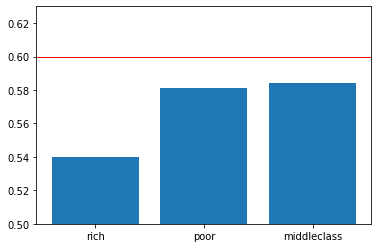

In [9]:
show = {}

count = df[["rich","middleclass","poor"]].sum()

for val in count.index:
    show[val] = (df[df[val]==1]["Y"].sum() / df[df[val]==1]["Y"].count())
ser = pd.Series(show,name="Wealth")
f, ax = plt.subplots(1)
ser = ser.sort_values(ascending=True)
plt.axhline(y=0.60,linewidth=1, color='red')
plt.bar(ser.index,ser)
ax.set_ylim(ymin=0.50)
print(ser.sort_values())

rich           4334
middleclass    5477
poor           2873
dtype: int64


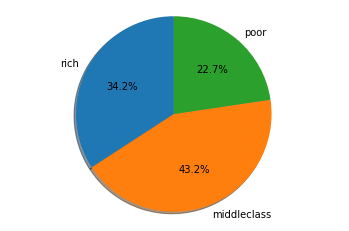

In [10]:
sizes = df[["rich","middleclass","poor"]].sum()
explode = (0, 0, 0)

fig1, ax1 = plt.subplots(1)
ax1.pie(sizes, explode=explode,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

print(df[["rich","middleclass","poor"]].sum())

(-1.2202963239941453,
 1.1118001307821304,
 -1.1121077874372518,
 1.1835236307282337)

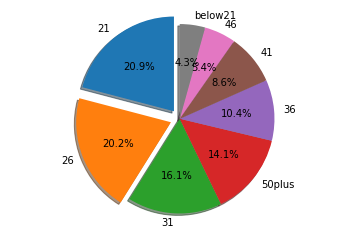

In [11]:
sizes = df["age"].value_counts()
explode = (0.1, 0.1, 0,0,0,0,0,0)

fig1, ax1 = plt.subplots(1)
ax1.pie(sizes, explode=explode,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [12]:
df["age0"] = df["age"].apply(lambda x: 1 if x =="below21" else 0)
df["age21"] = df["age"].apply(lambda x: 1 if x in ["21","26"] else 0)
df["age31"] = df["age"].apply(lambda x: 1 if x in ["31","36"] else 0)
df["age41"] = df["age"].apply(lambda x: 1 if x in ["41","46"] else 0)
df["age51"] = df["age"].apply(lambda x: 1 if x in ["50plus"] else 0)

50plus     0.508949
36         0.535254
31         0.546346
41         0.572736
46         0.575802
26         0.595936
21         0.598191
below21    0.634369
Name: Age, dtype: float64


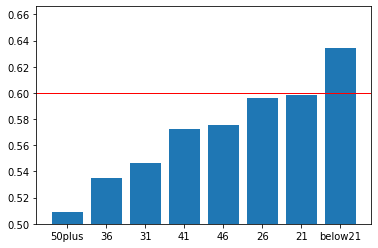

In [44]:
show = {}
for val in df["age"].unique():
    show[val]=(df[df["age"]==val]["Y"].sum() / df[df["age"]==val]["Y"].count())
ser = pd.Series(show,name="Age")
f, ax = plt.subplots(1)
ser = ser.sort_values(ascending=True)
plt.axhline(y=0.60,linewidth=1, color='red')
plt.bar(ser.index,ser)
ax.set_ylim(ymin=0.50)
print(ser.sort_values())

Potrebbe essere interessante capire come mai i 50plus sono il 14% ma performano così male

31, 26 e 21 rappresentano più della metà delle persone intervistate, ma 31 ha meno adesione, quindi guardiamo 26 e 21.

<BarContainer object of 9 artists>

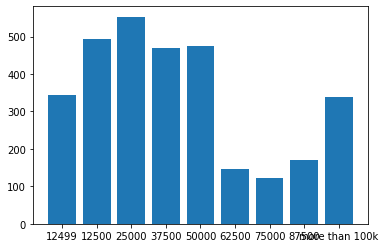

In [14]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["income"].value_counts().sort_index()
plt.bar(ser.index,ser)

<BarContainer object of 9 artists>

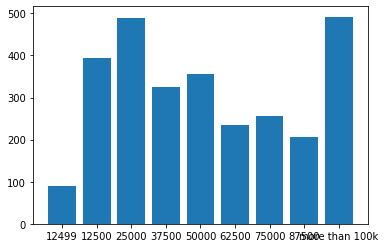

In [15]:
ser = df[df["age"].isin(["31","36","41","46"]) & df["Y"]==1]["income"].value_counts().sort_index()
plt.bar(ser.index,ser)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

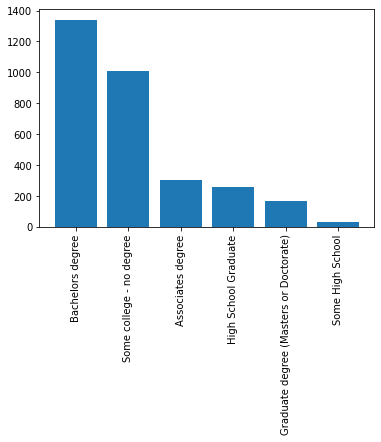

In [82]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["education"].value_counts()
plt.bar(ser.index,ser)
plt.xticks(rotation='vertical')

<BarContainer object of 2 artists>

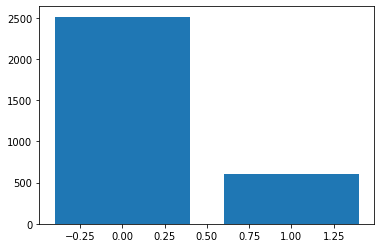

In [83]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["has_children"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

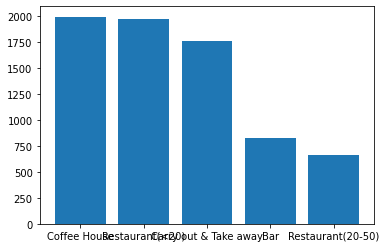

In [38]:
ser = df[df["Y"]==1]["coupon"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

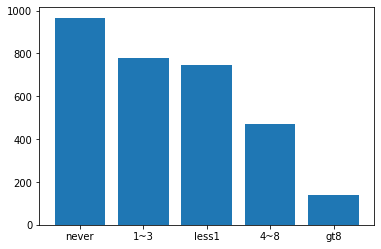

In [87]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["Bar"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

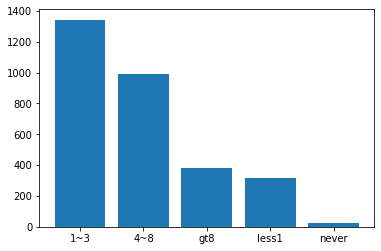

In [88]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["CarryAway"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

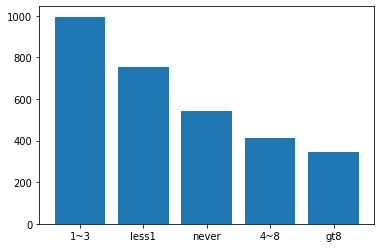

In [89]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["CoffeeHouse"].value_counts()
plt.bar(ser.index,ser)

In [91]:
young = df[df["age"].isin(["21","26"])]

Text(0.5, 0, 'How many times you usually go to...')

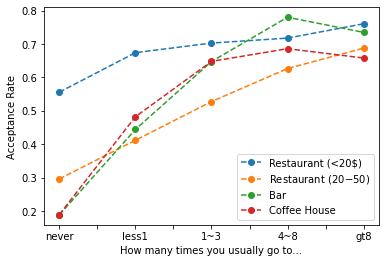

In [110]:
wow = pd.pivot_table(df[df["coupon"]=="Restaurant(<20)"],index=["RestaurantLessThan20"],values="Y")
wow.index=pd.Categorical(wow.index,categories=['never', 'less1', '1~3',"4~8","gt8"])
wow=wow.sort_index()
ax = wow.plot(marker="o",linestyle="dashed")

q=pd.pivot_table(df[df["coupon"]=="Restaurant(20-50)"],index=["Restaurant20To50",],values="Y")
q.index=pd.Categorical(q.index,categories=['never', 'less1', '1~3',"4~8","gt8"])
q=q.sort_index()
q.plot(ax=ax,marker="o",linestyle="dashed")


w=pd.pivot_table(df[df["coupon"]=="Bar"],index=["Bar"],values="Y")
w.index=pd.Categorical(w.index,categories=['never', 'less1', '1~3',"4~8","gt8"])
w=w.sort_index()
w.plot(ax=ax,marker="o",linestyle="dashed")



r=pd.pivot_table(df[df["coupon"]=="Coffee House"],index=["CoffeeHouse"],values="Y")
r.index=pd.Categorical(r.index,categories=['never', 'less1', '1~3',"4~8","gt8"])
r=r.sort_index()
r.plot(ax=ax,marker="o",linestyle="dashed")

ax.legend(["Restaurant (<20$)", "Restaurant (20$-50$)","Bar","Coffee House"])
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("How many times you usually go to...")


Text(0.5, 0, 'How many times you usually go to...')

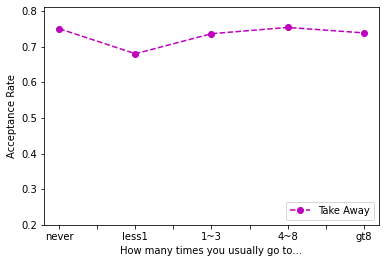

In [106]:
wow = pd.pivot_table(df[df["coupon"]=="Carry out & Take away"],index=["CarryAway"],values="Y")
wow.index=pd.Categorical(wow.index,categories=['never', 'less1', '1~3',"4~8","gt8"])
wow=wow.sort_index()
ax = wow.plot(color="m",marker="o",linestyle="dashed")
ax.legend(["Take Away"],loc="lower right")
ax.set_ylim(ymin=0.2,ymax=0.81)
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("How many times you usually go to...")



In [91]:
r=pd.pivot_table(df[df["coupon"]=="Coffee House"],index=["CoffeeHouse"],values="Y")
r

,Y
CoffeeHouse,
1~3,0.647793
4~8,0.685874
gt8,0.657895
less1,0.481860
never,0.188781


In [64]:
pd.pivot_table(df[df["coupon"]=="Restaurant(20-50)"],index=["Restaurant20To50",],values="Y")

,Y
Restaurant20To50,
1~3,0.527415
4~8,0.626374
gt8,0.687500
less1,0.411444
never,0.295652


In [68]:
pd.pivot_table(df[df["coupon"]=="Bar"],index=["Bar"],values="Y")

,Y
Bar,
1~3,0.647355
4~8,0.780000
gt8,0.734694
less1,0.443860
never,0.187952


In [70]:
pd.pivot_table(df[df["coupon"]=="Carry out & Take away"],index=["CarryAway"],values="Y")

,Y
CarryAway,
1~3,0.736111
4~8,0.753659
gt8,0.738411
less1,0.679887
never,0.750000


In [121]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'rich', 'middleclass', 'poor',
       'age0', 'age21', 'age31', 'age41', 'age51'],
      dtype='object')

In [61]:
coupon = pd.pivot_table(df,index=["toCoupon_GEQ5min"],values="Y").sort_values("Y")
coupon

,Y
toCoupon_GEQ5min,
1,0.568433


In [186]:
some = []
for col in ['rich', 'middleclass', 'poor','age0', 'age21', 'age31', 'age41', 'age51']:
  for col2 in ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
    'expiration', 'gender', 'maritalStatus', 'has_children',
    'Bar', 'CoffeeHouse',
    'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
    'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
    'direction_same', 'direction_opp']:
    found = pd.pivot_table(df[df[col]==1],index=[col2],values="Y")
    if not ((found[found["Y"]>0.70]).empty):
        some.append((col,(found[found["Y"]>0.70])))


######### CHECK DURING WINTER WHAT PLACE PREFERRED, AND CHECK AT WHAT TIME WHAT PLACE PREFERRED
######### CHECK POPULATION WITH CHILDREN WHAT PREFERS
######### 


In [187]:
some

[('rich',
                                Y
  coupon                         
  Carry out & Take away  0.702439),
 ('middleclass',
                                Y
  coupon                         
  Carry out & Take away  0.753196
  Restaurant(<20)        0.738294),
 ('middleclass',
                           Y
  Restaurant20To50          
  4~8               0.721591),
 ('poor',
                                Y
  coupon                         
  Carry out & Take away  0.751799),
 ('poor',
                           Y
  Restaurant20To50          
  4~8               0.812183),
 ('age0',
                    Y
  passanger          
  Friend(s)  0.712121),
 ('age0',
                     Y
  temperature         
  80           0.72242),
 ('age0',
               Y
  time          
  2PM   0.702703),
 ('age0',
                                Y
  coupon                         
  Carry out & Take away  0.728070
  Restaurant(<20)        0.734375),
 ('age0',
                      Y
  Coffee

<BarContainer object of 4 artists>

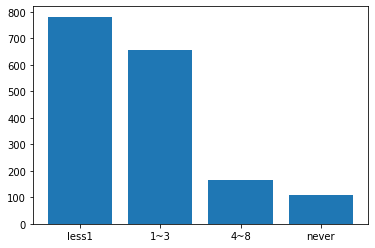

In [110]:
ser = df[df["income"]=="more than 100k"]["Restaurant20To50"].value_counts()
plt.bar(ser.index,ser)


Lets get a general look at the accepted the coupons

<BarContainer object of 5 artists>

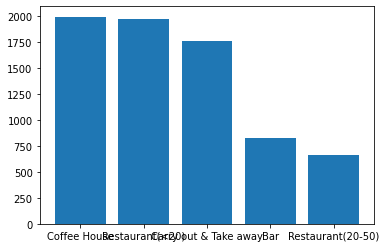

In [86]:
ser = df[df["Y"]==1]["coupon"].value_counts()
plt.bar(ser.index,ser)

In [7]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [69]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [108]:
pd.pivot_table(df, values='Y', index=['maritalStatus'], aggfunc=np.mean)

,Y
maritalStatus,
Divorced,0.529070
Married partner,0.542941
Single,0.605850
Unmarried partner,0.561299
Widowed,0.476923


# Dataset balanced/unbalanced

In [4]:
df["Y"].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

(array([5474., 7210.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

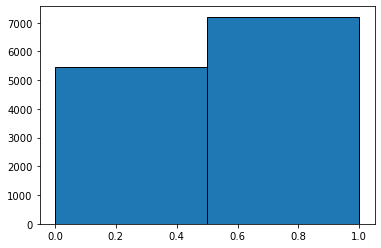

In [9]:
plt.hist(df["Y"],bins = 2, edgecolor = 'black')

In [15]:
df["Y"].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

([<matplotlib.patches.Wedge at 0x2307cf0da60>,
 [Text(-0.2560024141966815, 1.1723748393434033, 'Used coupon'),
  Text(0.25600252396233425, -1.1723748153747227, 'Not used coupon')],
 [Text(-0.14933474161473087, 0.6838853229503186, '56.8%'),
  Text(0.14933480564469495, -0.6838853089685881, '43.2%')])

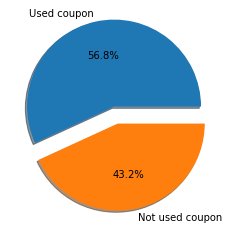

In [22]:
sizes = list(df["Y"].value_counts())
plt.pie(sizes, labels = ["Used coupon","Not used coupon"],explode = (0.1,0.1), autopct='%1.1f%%', shadow = True)

The dataset is balanced. This prevents us from oversampling/undersampling in order to obtain better accuracy. An imbalanced dataset can inject bias in the solution towards the majority class.

# NaN values identification

In [5]:
df.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [34]:
null_values = {}
for el in range(len(df.isnull().any())):
    if df.isnull().any()[el] == True:
        null_values[df.columns[el]] = sum(df.iloc[:,el].isna())
null_values #Number of NaN values per columns

{'car': 12576,
 'Bar': 107,
 'CoffeeHouse': 217,
 'CarryAway': 151,
 'RestaurantLessThan20': 130,
 'Restaurant20To50': 189}

In [39]:
null_values_perc = {}
for el in range(len(df.isnull().any())):
    if df.isnull().any()[el] == True:
        null_values_perc[df.columns[el]] = (sum(df.iloc[:,el].isna())/len(df)*100)
null_values_perc # Percentage of instances with null values

{'car': 99.14853358561967,
 'Bar': 0.8435824660990224,
 'CoffeeHouse': 1.7108167770419427,
 'CarryAway': 1.1904761904761905,
 'RestaurantLessThan20': 1.0249132765689057,
 'Restaurant20To50': 1.490066225165563}

"Car" variable contains NaN for almost all the instances, while all the other variables have a percentage of NaN values within 2%.

In [47]:
for el in null_values.keys():
    print(df.dtypes[el]) # all the variables with NaN are categorical

object
object
object
object
object
object


How to deal with Nan values? 
Ideas:
   1. using the mean for numerical features and the mode for categorical features (methods which dosen't prone for overfitting)
   2. back-fill and forward-fill (used for Time-series data)
   3. identificating NaN values as new categories (if the variables are categorical)
   4. deleting columns with too many NaNs (look at the "car" column. If the info we are deleting is not important that's a good solution)

In [53]:
df["car"].value_counts() # the few present data are evenly distributed with regard to the type

Mazda5                                      22
Scooter and motorcycle                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

In the following subsections there are two different implemented choices:
   * "car NaN" values identified with a new category and the other NaN with the mode
   * all the NaN are replaced with new categories (these new categories differ based on the feature they come from)
   * drop the "car column and then proxy the other columns with the mode

## FIRST NaN REPLACEMENT

In [75]:
new_df1 = df.copy()
new_df1['car'] = new_df1['car'].fillna('no_info_car')
new_df1['car'].value_counts()

no_info_car                                 12576
Mazda5                                         22
Scooter and motorcycle                         22
do not drive                                   22
Car that is too old to install Onstar :D       21
crossover                                      21
Name: car, dtype: int64

In [76]:
for el in list(null_values.keys())[1:]:
    new_df1[el] = new_df1[el].fillna(new_df1[el].mode()[0])

In [77]:
new_df1.isnull().any() #check no NaNs

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                     False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

## SECOND NaN REPLACEMENT

In [83]:
new_df2 = df.copy()
new_cat = ['no_info_car','no_info_bar','no_info_coffeehouse','no_info_carryaway','no_info_rest<20','no_info_rest20to50']
for el in range(len(new_cat)):
    new_df2[list(null_values.keys())[el]] = new_df2[list(null_values.keys())[el]].fillna(new_cat[el])


In [85]:
new_df2['Bar'].value_counts() #as example, check the Bar column

never          5197
less1          3482
1~3            2473
4~8            1076
gt8             349
no_info_bar     107
Name: Bar, dtype: int64

In [86]:
new_df2.isnull().any() #check no NaNs

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                     False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

## THIRD NaN REPLACEMENT

In [88]:
new_df3 = df.copy()
del new_df3['car']

In [95]:
new_df3['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [96]:
for el in list(null_values.keys())[1:]:
    new_df3[el] = new_df3[el].fillna(new_df3[el].mode()[0])

In [97]:
new_df3.isnull().any() #check no NaNs

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

# ONEHOT ENCODING OF CATEGORICAL VARIABLES

## First case (to match "First NaN replacement")

In [142]:
new_df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [143]:
prova = pd.DataFrame()
for el in new_df1.columns:
    prova = pd.concat([prova,pd.get_dummies(new_df1[el])],axis=1)
prova

,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,...,0,1,0,1,0,1,0,1,0,1
0,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,1,1,0,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
12681,0,0,1,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,1,0


In [144]:
count = 0 #check the number of columns matches the number of categories
for el in new_df1.columns:
    count += len(new_df1[el].value_counts())
count

124